In [1]:
# Importing all files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing

In [2]:
from google.colab import files

In [3]:
%rm -rf TrainClustering
!git clone https://github.com/ZubeenK/ML_project

Cloning into 'ML_project'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [4]:
trains_mdf = pd.read_csv("/content/ML_project/GQPD_work.csv")

In [5]:
display(trains_mdf)

,Unnamed: 0,TRAIN,WEEKDAYS,SEQ,STATION,ARVL,STPG,DPRT,NEXT,BLCKSCTN,COABLCKSCTN,DAY,stationNameAgain,stationCode,Route,direction,mainBlocks,commonBlocks,totalBlocks
0,581,11015,"1,1,1,1,1,1,1",95,ET,46800,600,47400,48000,ET-PRKD,ET-PRKD,1,ET,4083,2_NDLS-MAS,down,1.0,0.0,1.0
1,582,11015,"1,1,1,1,1,1,1",96,PRKD,48000,0,48000,48480,PRKD-HBD,PRKD-HBD,1,PRKD,4082,2_NDLS-MAS,down,1.0,0.0,1.0
2,583,11015,"1,1,1,1,1,1,1",97,HBD,48480,120,48600,49080,HBD-BNI,HBD-BNI,1,HBD,4081,2_NDLS-MAS,down,1.0,0.0,1.0
3,584,11015,"1,1,1,1,1,1,1",98,BNI,49080,0,49080,49860,BNI-MIG,BNI-MIG,1,BNI,4080,2_NDLS-MAS,down,1.0,0.0,1.0
4,585,11015,"1,1,1,1,1,1,1",99,MIG,49860,0,49860,50220,MIG-CHQ,MIG-CHQ,1,MIG,4079,2_NDLS-MAS,down,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65645,215048,82902,"1,1,1,0,1,1,1",84,BVI,44820,120,45000,45780,BVI-ADH,BVI-ADH,1,BVI,2190,1_NDLS-MMCT,up,1.0,0.0,1.0
65646,215049,82902,"1,1,1,0,1,1,1",85,ADH,45780,0,45780,46200,ADH-BA,ADH-BA,1,ADH,2191,1_NDLS-MMCT,up,1.0,0.0,1.0
65647,215050,82902,"1,1,1,0,1,1,1",86,BA,46200,0,46200,46440,BA-DDR,BA-DDR,1,BA,2192,1_NDLS-MMCT,up,1.0,0.0,1.0
65648,215051,82902,"1,1,1,0,1,1,1",87,DDR,46440,0,46440,47400,DDR-MMCT,DDR-MMCT,1,DDR,2193,1_NDLS-MMCT,up,1.0,0.0,1.0


In [6]:
trains_mdf.dtypes

Unnamed: 0            int64
TRAIN                 int64
WEEKDAYS             object
SEQ                   int64
STATION              object
ARVL                  int64
STPG                  int64
DPRT                  int64
NEXT                  int64
BLCKSCTN             object
COABLCKSCTN          object
DAY                   int64
stationNameAgain     object
stationCode           int64
Route                object
direction            object
mainBlocks          float64
commonBlocks        float64
totalBlocks         float64
dtype: object

In [7]:
trains_mdf.columns

Index(['Unnamed: 0', 'TRAIN', 'WEEKDAYS', 'SEQ', 'STATION', 'ARVL', 'STPG',
       'DPRT', 'NEXT', 'BLCKSCTN', 'COABLCKSCTN', 'DAY', 'stationNameAgain',
       'stationCode', 'Route', 'direction', 'mainBlocks', 'commonBlocks',
       'totalBlocks'],
      dtype='object')

In [8]:
trains_mdf.isnull().sum()

Unnamed: 0             0
TRAIN                  0
WEEKDAYS               0
SEQ                    0
STATION                0
ARVL                   0
STPG                   0
DPRT                   0
NEXT                   0
BLCKSCTN             256
COABLCKSCTN          247
DAY                    0
stationNameAgain       0
stationCode            0
Route                  0
direction           1355
mainBlocks          1355
commonBlocks        1355
totalBlocks         1355
dtype: int64

In [9]:
all_stn = trains_mdf['STATION'].drop_duplicates().tolist()
print("Total stations count {}".format( len( all_stn ) ))

Total stations count 369


In [10]:
all_train = trains_mdf['TRAIN'].drop_duplicates().tolist()
print("Total trains count {}".format( len( all_train ) ))

Total trains count 1253


In [11]:
daily_trains_df = trains_mdf[trains_mdf['WEEKDAYS']=='1,1,1,1,1,1,1']

In [12]:
display(daily_trains_df)

,Unnamed: 0,TRAIN,WEEKDAYS,SEQ,STATION,ARVL,STPG,DPRT,NEXT,BLCKSCTN,COABLCKSCTN,DAY,stationNameAgain,stationCode,Route,direction,mainBlocks,commonBlocks,totalBlocks
0,581,11015,"1,1,1,1,1,1,1",95,ET,46800,600,47400,48000,ET-PRKD,ET-PRKD,1,ET,4083,2_NDLS-MAS,down,1.0,0.0,1.0
1,582,11015,"1,1,1,1,1,1,1",96,PRKD,48000,0,48000,48480,PRKD-HBD,PRKD-HBD,1,PRKD,4082,2_NDLS-MAS,down,1.0,0.0,1.0
2,583,11015,"1,1,1,1,1,1,1",97,HBD,48480,120,48600,49080,HBD-BNI,HBD-BNI,1,HBD,4081,2_NDLS-MAS,down,1.0,0.0,1.0
3,584,11015,"1,1,1,1,1,1,1",98,BNI,49080,0,49080,49860,BNI-MIG,BNI-MIG,1,BNI,4080,2_NDLS-MAS,down,1.0,0.0,1.0
4,585,11015,"1,1,1,1,1,1,1",99,MIG,49860,0,49860,50220,MIG-CHQ,MIG-CHQ,1,MIG,4079,2_NDLS-MAS,down,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65169,213987,79317,"1,1,1,1,1,1,1",20,RTM,33600,0,33600,33600,NaN,NaN,1,RTM,2093,1_NDLS-MMCT,NaN,NaN,NaN,NaN
65170,213988,79318,"1,1,1,1,1,1,1",1,RTM,68400,0,68400,69180,RTM-NGW,RTM-NGW,1,RTM,2093,1_NDLS-MMCT,NaN,NaN,NaN,NaN
65171,213989,79455,"1,1,1,1,1,1,1",1,BRC,41400,0,41400,41640,BRC-VS,BRC-VS,1,BRC,2129,1_NDLS-MMCT,up,1.0,0.0,1.0
65172,213990,79455,"1,1,1,1,1,1,1",2,VS,41640,0,41640,42120,VS-PRTN,VS-PRTN,1,VS,2130,1_NDLS-MMCT,NaN,NaN,NaN,NaN


In [13]:
non_daily_trains_df = pd.DataFrame(trains_mdf[trains_mdf['WEEKDAYS']!='1,1,1,1,1,1,1']).reset_index(drop = True)
non_daily_trains_df

,Unnamed: 0,TRAIN,WEEKDAYS,SEQ,STATION,ARVL,STPG,DPRT,NEXT,BLCKSCTN,COABLCKSCTN,DAY,stationNameAgain,stationCode,Route,direction,mainBlocks,commonBlocks,totalBlocks
0,2368,11033,"0,0,0,1,0,0,0",96,ET,106800,600,107400,108480,ET-GRO,ET-GRO,2,ET,4083,2_NDLS-MAS,NaN,NaN,NaN,NaN
1,2373,11034,"0,0,0,0,0,1,0",171,ET,150600,600,151200,151620,ET-ETB,ET-ETB,2,ET,4083,2_NDLS-MAS,NaN,NaN,NaN,NaN
2,2519,11037,"0,0,0,0,1,0,0",96,ET,106800,600,107400,108120,ET-GRO,ET-GRO,2,ET,4083,2_NDLS-MAS,NaN,NaN,NaN,NaN
3,2524,11038,"0,0,0,0,0,0,1",131,ET,125400,600,126000,126480,ET-ETB,ET-ETB,2,ET,4083,2_NDLS-MAS,NaN,NaN,NaN,NaN
4,3481,11045,"0,0,0,0,0,1,0",87,MJRI,102240,300,102540,103200,MJRI-WRR,MJRI-WRR,2,MJRI,7010,2_NDLS-MAS,down,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49643,215048,82902,"1,1,1,0,1,1,1",84,BVI,44820,120,45000,45780,BVI-ADH,BVI-ADH,1,BVI,2190,1_NDLS-MMCT,up,1.0,0.0,1.0
49644,215049,82902,"1,1,1,0,1,1,1",85,ADH,45780,0,45780,46200,ADH-BA,ADH-BA,1,ADH,2191,1_NDLS-MMCT,up,1.0,0.0,1.0
49645,215050,82902,"1,1,1,0,1,1,1",86,BA,46200,0,46200,46440,BA-DDR,BA-DDR,1,BA,2192,1_NDLS-MMCT,up,1.0,0.0,1.0
49646,215051,82902,"1,1,1,0,1,1,1",87,DDR,46440,0,46440,47400,DDR-MMCT,DDR-MMCT,1,DDR,2193,1_NDLS-MMCT,up,1.0,0.0,1.0


In [14]:
non_daily_trains_df['Mon'] = -1
non_daily_trains_df['Tue'] = -1
non_daily_trains_df['Wed'] = -1
non_daily_trains_df['Thu'] = -1
non_daily_trains_df['Fri'] = -1
non_daily_trains_df['Sat'] = -1
non_daily_trains_df['Sun'] = -1

In [15]:
non_daily_trains_df

,Unnamed: 0,TRAIN,WEEKDAYS,SEQ,STATION,ARVL,STPG,DPRT,NEXT,BLCKSCTN,COABLCKSCTN,DAY,stationNameAgain,stationCode,Route,direction,mainBlocks,commonBlocks,totalBlocks,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,2368,11033,"0,0,0,1,0,0,0",96,ET,106800,600,107400,108480,ET-GRO,ET-GRO,2,ET,4083,2_NDLS-MAS,NaN,NaN,NaN,NaN,-1,-1,-1,-1,-1,-1,-1
1,2373,11034,"0,0,0,0,0,1,0",171,ET,150600,600,151200,151620,ET-ETB,ET-ETB,2,ET,4083,2_NDLS-MAS,NaN,NaN,NaN,NaN,-1,-1,-1,-1,-1,-1,-1
2,2519,11037,"0,0,0,0,1,0,0",96,ET,106800,600,107400,108120,ET-GRO,ET-GRO,2,ET,4083,2_NDLS-MAS,NaN,NaN,NaN,NaN,-1,-1,-1,-1,-1,-1,-1
3,2524,11038,"0,0,0,0,0,0,1",131,ET,125400,600,126000,126480,ET-ETB,ET-ETB,2,ET,4083,2_NDLS-MAS,NaN,NaN,NaN,NaN,-1,-1,-1,-1,-1,-1,-1
4,3481,11045,"0,0,0,0,0,1,0",87,MJRI,102240,300,102540,103200,MJRI-WRR,MJRI-WRR,2,MJRI,7010,2_NDLS-MAS,down,1.0,0.0,1.0,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49643,215048,82902,"1,1,1,0,1,1,1",84,BVI,44820,120,45000,45780,BVI-ADH,BVI-ADH,1,BVI,2190,1_NDLS-MMCT,up,1.0,0.0,1.0,-1,-1,-1,-1,-1,-1,-1
49644,215049,82902,"1,1,1,0,1,1,1",85,ADH,45780,0,45780,46200,ADH-BA,ADH-BA,1,ADH,2191,1_NDLS-MMCT,up,1.0,0.0,1.0,-1,-1,-1,-1,-1,-1,-1
49645,215050,82902,"1,1,1,0,1,1,1",86,BA,46200,0,46200,46440,BA-DDR,BA-DDR,1,BA,2192,1_NDLS-MMCT,up,1.0,0.0,1.0,-1,-1,-1,-1,-1,-1,-1
49646,215051,82902,"1,1,1,0,1,1,1",87,DDR,46440,0,46440,47400,DDR-MMCT,DDR-MMCT,1,DDR,2193,1_NDLS-MMCT,up,1.0,0.0,1.0,-1,-1,-1,-1,-1,-1,-1


In [16]:
non_daily_trains_df['COABLCKSCTN'].nunique()

724

In [17]:
for i in non_daily_trains_df.index:
  dayList = non_daily_trains_df['WEEKDAYS'][i].split(sep=',')
  dayList = [int(day) for day in dayList]
  
  non_daily_trains_df['Mon'][i] = dayList[0]
  non_daily_trains_df['Tue'][i] = dayList[1]
  non_daily_trains_df['Wed'][i] = dayList[2]
  non_daily_trains_df['Thu'][i] = dayList[3]
  non_daily_trains_df['Fri'][i] = dayList[4]
  non_daily_trains_df['Sat'][i] = dayList[5]
  non_daily_trains_df['Sun'][i] = dayList[6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

In [18]:
display(non_daily_trains_df)

,Unnamed: 0,TRAIN,WEEKDAYS,SEQ,STATION,ARVL,STPG,DPRT,NEXT,BLCKSCTN,COABLCKSCTN,DAY,stationNameAgain,stationCode,Route,direction,mainBlocks,commonBlocks,totalBlocks,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,2368,11033,"0,0,0,1,0,0,0",96,ET,106800,600,107400,108480,ET-GRO,ET-GRO,2,ET,4083,2_NDLS-MAS,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0
1,2373,11034,"0,0,0,0,0,1,0",171,ET,150600,600,151200,151620,ET-ETB,ET-ETB,2,ET,4083,2_NDLS-MAS,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0
2,2519,11037,"0,0,0,0,1,0,0",96,ET,106800,600,107400,108120,ET-GRO,ET-GRO,2,ET,4083,2_NDLS-MAS,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0
3,2524,11038,"0,0,0,0,0,0,1",131,ET,125400,600,126000,126480,ET-ETB,ET-ETB,2,ET,4083,2_NDLS-MAS,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1
4,3481,11045,"0,0,0,0,0,1,0",87,MJRI,102240,300,102540,103200,MJRI-WRR,MJRI-WRR,2,MJRI,7010,2_NDLS-MAS,down,1.0,0.0,1.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49643,215048,82902,"1,1,1,0,1,1,1",84,BVI,44820,120,45000,45780,BVI-ADH,BVI-ADH,1,BVI,2190,1_NDLS-MMCT,up,1.0,0.0,1.0,1,1,1,0,1,1,1
49644,215049,82902,"1,1,1,0,1,1,1",85,ADH,45780,0,45780,46200,ADH-BA,ADH-BA,1,ADH,2191,1_NDLS-MMCT,up,1.0,0.0,1.0,1,1,1,0,1,1,1
49645,215050,82902,"1,1,1,0,1,1,1",86,BA,46200,0,46200,46440,BA-DDR,BA-DDR,1,BA,2192,1_NDLS-MMCT,up,1.0,0.0,1.0,1,1,1,0,1,1,1
49646,215051,82902,"1,1,1,0,1,1,1",87,DDR,46440,0,46440,47400,DDR-MMCT,DDR-MMCT,1,DDR,2193,1_NDLS-MMCT,up,1.0,0.0,1.0,1,1,1,0,1,1,1


In [19]:
up_ndt_df = pd.DataFrame(non_daily_trains_df[non_daily_trains_df['direction'] == 'up'])
#display(up_ndt_df)

In [20]:
down_ndt_df = pd.DataFrame(non_daily_trains_df[non_daily_trains_df['direction'] == 'down'])
#display(down_ndt_df)

In [21]:
down_ndt_df['COABLCKSCTN'].nunique()

340

In [22]:
down_ndt_df['Temp1']=0
down_ndt_df['Temp2']=0

In [23]:
for i in down_ndt_df.index:
    stationlist = down_ndt_df['COABLCKSCTN'][i].split(sep='-')
    stationlist = [str(day) for day in stationlist]

    down_ndt_df['Temp1'][i] = stationlist[0]
    down_ndt_df['Temp2'][i] = stationlist[1]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
down_ndt_df['Temp1'].unique()


array(['MJRI', 'WRR', 'CKNI', 'NGI', 'YNA', 'HGT', 'WG', 'SNN', 'BPK',
       'CHJC', 'GNQ', 'BWRA', 'KSWR', 'KOHL', 'SNKB', 'MER', 'KATL',
       'KLBA', 'TNH', 'NRKR', 'DDMT', 'PAR', 'TEO', 'GDKP', 'CCD', 'HTN',
       'MTY', 'JKR', 'AMLA', 'BYS', 'MALK', 'BZU', 'MJY', 'DHQ', 'GDYA',
       'BBTR', 'MGRD', 'DOH', 'POX', 'KQE', 'SAHL', 'TAKU', 'KSLA',
       'KRTH', 'JUH', 'BSR', 'VR', 'VTN', 'SAH', 'KLV', 'PLG', 'BOR',
       'VGN', 'DRD', 'GVD', 'UBR', 'SJN', 'BLD', 'VAPI', 'UVD', 'PAD',
       'ATUL', 'BL', 'DGI', 'BIM', 'AML', 'VDH', 'NVS', 'MRL', 'SCH',
       'BHET', 'UDN', 'ST', 'URN', 'KSE', 'GTX', 'SYN', 'KIM', 'KSB',
       'PAO', 'AKV', 'BH', 'CVJ', 'NIU', 'VRE', 'PLJ', 'LKD', 'MYG',
       'KSPR', 'ITA', 'VRM', 'MPR', 'VS', 'BRC', 'BDA', 'ET', 'PRKD',
       'HBD', 'BNI', 'MIG', 'CHQ', 'BKA', 'ODG', 'ITKL', 'MDDP', 'MSO',
       'HBJ', 'BPL', 'NSZ', 'SUW', 'BVB', 'DWG', 'SMT', 'SCI', 'BHS',
       'SORI', 'SUMR', 'GLG', 'PAI', 'BAQ', 'BET', 'CLHT', 'KAH', 'MABA',
       'B

In [25]:
down_ndt_df['Temp2'].unique()

array(['WRR', 'CKNI', 'NGI', 'YNA', 'HGT', 'WG', 'SNN', 'BPK', 'CHJC',
       'SEGM', 'BWRA', 'KSWR', 'KOHL', 'SNKB', 'MER', 'KATL', 'KLBA',
       'TNH', 'NRKR', 'DDMT', 'PAR', 'TEO', 'GDKP', 'CCD', 'HTN', 'MTY',
       'JKR', 'AMLA', 'BYS', 'MALK', 'BZU', 'MJY', 'DHQ', 'GDYA', 'BBTR',
       'MGRD', 'DOH', 'POX', 'KQE', 'SAHL', 'TAKU', 'KSLA', 'KRTH', 'JUH',
       'ET', 'VR', 'VTN', 'SAH', 'KLV', 'PLG', 'BOR', 'VGN', 'DRD', 'GVD',
       'UBR', 'SJN', 'BLD', 'VAPI', 'UVD', 'PAD', 'ATUL', 'BL', 'DGI',
       'BIM', 'AML', 'VDH', 'NVS', 'MRL', 'SCH', 'BHET', 'UDN', 'ST',
       'URN', 'KSE', 'GTX', 'SYN', 'KIM', 'KSB', 'PAO', 'AKV', 'BH',
       'CVJ', 'NIU', 'VRE', 'PLJ', 'LKD', 'MYG', 'KSPR', 'ITA', 'VRM',
       'MPR', 'VS', 'BRC', 'BDA', 'BRGY', 'PRKD', 'HBD', 'BNI', 'MIG',
       'CHQ', 'BKA', 'ODG', 'ITKL', 'MDDP', 'MSO', 'HBJ', 'BPL', 'NSZ',
       'SUW', 'BVB', 'DWG', 'SMT', 'SCI', 'BHS', 'SORI', 'SUMR', 'GLG',
       'PAI', 'BAQ', 'BET', 'CLHT', 'KAH', 'MABA', 'KIKA', 'AGD', 

In [26]:
column_values = down_ndt_df[["Temp1", "Temp2"]]. values. ravel()
unique_values = pd. unique(column_values)
print(unique_values)
len(unique_values)

['MJRI' 'WRR' 'CKNI' 'NGI' 'YNA' 'HGT' 'WG' 'SNN' 'BPK' 'CHJC' 'SEGM'
 'GNQ' 'BWRA' 'KSWR' 'KOHL' 'SNKB' 'MER' 'KATL' 'KLBA' 'TNH' 'NRKR' 'DDMT'
 'PAR' 'TEO' 'GDKP' 'CCD' 'HTN' 'MTY' 'JKR' 'AMLA' 'BYS' 'MALK' 'BZU'
 'MJY' 'DHQ' 'GDYA' 'BBTR' 'MGRD' 'DOH' 'POX' 'KQE' 'SAHL' 'TAKU' 'KSLA'
 'KRTH' 'JUH' 'ET' 'BSR' 'VR' 'VTN' 'SAH' 'KLV' 'PLG' 'BOR' 'VGN' 'DRD'
 'GVD' 'UBR' 'SJN' 'BLD' 'VAPI' 'UVD' 'PAD' 'ATUL' 'BL' 'DGI' 'BIM' 'AML'
 'VDH' 'NVS' 'MRL' 'SCH' 'BHET' 'UDN' 'ST' 'URN' 'KSE' 'GTX' 'SYN' 'KIM'
 'KSB' 'PAO' 'AKV' 'BH' 'CVJ' 'NIU' 'VRE' 'PLJ' 'LKD' 'MYG' 'KSPR' 'ITA'
 'VRM' 'MPR' 'VS' 'BRC' 'BDA' 'BRGY' 'PRKD' 'HBD' 'BNI' 'MIG' 'CHQ' 'BKA'
 'ODG' 'ITKL' 'MDDP' 'MSO' 'HBJ' 'BPL' 'NSZ' 'SUW' 'BVB' 'DWG' 'SMT' 'SCI'
 'BHS' 'SORI' 'SUMR' 'GLG' 'PAI' 'BAQ' 'BET' 'CLHT' 'KAH' 'MABA' 'KIKA'
 'BINA' 'AGD' 'KOA' 'MXS' 'DUA' 'JLN' 'JRO' 'LAR' 'DWA' 'JHA' 'BJA' 'DLA'
 'TBT' 'MZX' 'BZY' 'BPW' 'BAB' 'KHJ' 'BJI' 'JHSA' 'JHS' 'CYI' 'PIO' 'SMLA'
 'CPN' 'BKRL' 'DRL' 'KRSA' 'GDA' 'KIZ' 'CCL' 'SAT'

342

In [27]:
down_ndt_df['Temp'] = down_ndt_df[['Temp1', 'Temp2']].apply(lambda x: ' '.join(x), axis = 1)


In [28]:
#SEGM MTZ added from Destination Station
columns=['MJRI', 'WRR', 'CKNI', 'NGI', 'YNA', 'HGT', 'WG', 'SNN', 'BPK',
       'CHJC', 'SEGM','GNQ', 'BWRA', 'KSWR', 'KOHL', 'SNKB', 'MER', 'KATL',
       'KLBA', 'TNH', 'NRKR', 'DDMT', 'PAR', 'TEO', 'GDKP', 'CCD', 'HTN',
       'MTY', 'JKR', 'AMLA', 'BYS', 'MALK', 'BZU', 'MJY', 'DHQ', 'GDYA',
       'BBTR', 'MGRD', 'DOH', 'POX', 'KQE', 'SAHL', 'TAKU', 'KSLA',
       'KRTH', 'JUH', 'BSR', 'VR', 'VTN', 'SAH', 'KLV', 'PLG', 'BOR',
       'VGN', 'DRD', 'GVD', 'UBR', 'SJN', 'BLD', 'VAPI', 'UVD', 'PAD',
       'ATUL', 'BL', 'DGI', 'BIM', 'AML', 'VDH', 'NVS', 'MRL', 'SCH',
       'BHET', 'UDN', 'ST', 'URN', 'KSE', 'GTX', 'SYN', 'KIM', 'KSB',
       'PAO', 'AKV', 'BH', 'CVJ', 'NIU', 'VRE', 'PLJ', 'LKD', 'MYG',
       'KSPR', 'ITA', 'VRM', 'MPR', 'VS', 'BRC', 'BDA', 'ET', 'PRKD',
       'HBD', 'BNI', 'MIG', 'CHQ', 'BKA', 'ODG', 'ITKL', 'MDDP', 'MSO',
       'HBJ', 'BPL', 'NSZ', 'SUW', 'BVB', 'DWG', 'SMT', 'SCI', 'BHS',
       'SORI', 'SUMR', 'GLG', 'PAI', 'BAQ', 'BET', 'CLHT', 'KAH', 'MABA',
       'BINA', 'AGD', 'KOA', 'MXS', 'DUA', 'JLN', 'JRO', 'LAR', 'DWA',
       'JHA', 'BJA', 'DLA', 'TBT', 'MZX', 'BZY', 'BPW', 'BAB', 'KHJ',
       'BJI', 'JHSA', 'BRGY', 'CYI', 'PIO', 'SMLA', 'CPN', 'BKRL', 'DRL',
       'KRSA', 'GDA', 'KIZ', 'CCL', 'SAT', 'PPD', 'LMK', 'MAM', 'USRA',
       'JKT', 'RET', 'DHD', 'BIO', 'ANAS', 'MGN', 'THDR', 'BJG', 'PCN',
       'AGR', 'BMI', 'BOG', 'RTI', 'BILD', 'MRN', 'RTD', 'RTM', 'RTME',
       'BOD', 'RNH', 'KUH', 'BRNA', 'JHS', 'KRQ', 'CIRL', 'DAA', 'SOR',
       'KTRA', 'DBA', 'AEH', 'ARI', 'SLV', 'STLI', 'ADH', 'BVI', 'BYR',
       'GWL', 'BLNR', 'RRU', 'BAO', 'SANK', 'MRA', 'SIKD', 'HET', 'DHO',
       'MIA', 'JJ', 'BHA', 'AGC', 'RKM', 'BFP', 'RNKA', 'KXM', 'FAR',
       'BAD','MTJ', 'NAD', 'RLK', 'MEP', 'LNR', 'VMA', 'THUR', 'TLZ', 'CMU',
       'NKH', 'SVA', 'SGZ', 'GOH', 'KRLS', 'BWM', 'DKRA', 'JHW', 'RMA',
       'MKX', 'KIW', 'DARA', 'RDT', 'ALNI', 'DDV', 'DKNT', 'KOTA', 'KCCN',
       'KIKA', 'MMCT', 'KZJE', 'KMPT', 'HSP', 'OPL', 'JMKT', 'BGSF',
       'PTKP', 'KOLR', 'PDPL', 'RGPM', 'RDM', 'PPZ', 'MCI', 'MMZ', 'BPA',
       'RECH', 'RLW', 'ASAF', 'RLT', 'SKZR', 'VEM', 'SRUR', 'MKDI',
       'WIRR', 'VHGN', 'BPQ', 'BUPH', 'CD', 'VVKN', 'CPW', 'TAE', 'BUX',
       'GQL', 'GNCN', 'KPTN', 'ARE', 'KPZ', 'GKB', 'LBN', 'LKE', 'IDG',
       'AMLI', 'RWJ', 'KTA', 'SWM', 'SMDC', 'RNT', 'MXL', 'MLZ', 'NMD',
       'NNW', 'LRU', 'GGC', 'COO', 'PDZ', 'SMBJ', 'HAN', 'FSP', 'DY',
       'BXN', 'KEV', 'PNGR', 'SWAR', 'BTE', 'DUM', 'JJA', 'MSRP', 'DDR',
       'BA', 'VBC', 'NWBV', 'RYP', 'KI', 'CVV', 'GNN', 'YP', 'TNGM',
       'MDR', 'MTMI', 'BKL', 'CKN', 'PNDP', 'KMT', 'MLMG', 'PPY', 'DKJ',
       'GUU', 'MABD', 'TAA', 'KDM', 'INK', 'NKD', 'YGL', 'CLE', 'WL',
       'KZJF', 'MAGH']

In [29]:
down_ndt_df.columns.values

array(['Unnamed: 0', 'TRAIN', 'WEEKDAYS', 'SEQ', 'STATION', 'ARVL',
       'STPG', 'DPRT', 'NEXT', 'BLCKSCTN', 'COABLCKSCTN', 'DAY',
       'stationNameAgain', 'stationCode', 'Route', 'direction',
       'mainBlocks', 'commonBlocks', 'totalBlocks', 'Mon', 'Tue', 'Wed',
       'Thu', 'Fri', 'Sat', 'Sun', 'Temp1', 'Temp2', 'Temp'], dtype=object)

In [30]:
down_ndt_df[columns]=0


In [31]:
down_ndt_df

,Unnamed: 0,TRAIN,WEEKDAYS,SEQ,STATION,ARVL,STPG,DPRT,NEXT,BLCKSCTN,COABLCKSCTN,DAY,stationNameAgain,stationCode,Route,direction,mainBlocks,commonBlocks,totalBlocks,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Temp1,Temp2,Temp,MJRI,WRR,CKNI,NGI,YNA,HGT,WG,SNN,BPK,CHJC,SEGM,...,FSP,DY,BXN,KEV,PNGR,SWAR,BTE,DUM,JJA,MSRP,DDR,BA,VBC,NWBV,RYP,KI,CVV,GNN,YP,TNGM,MDR,MTMI,BKL,CKN,PNDP,KMT,MLMG,PPY,DKJ,GUU,MABD,TAA,KDM,INK,NKD,YGL,CLE,WL,KZJF,MAGH
4,3481,11045,"0,0,0,0,0,1,0",87,MJRI,102240,300,102540,103200,MJRI-WRR,MJRI-WRR,2,MJRI,7010,2_NDLS-MAS,down,1.0,0.0,1.0,0,0,0,0,0,1,0,MJRI,WRR,MJRI WRR,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,3482,11045,"0,0,0,0,0,1,0",88,WRR,103200,0,103200,103500,WRR-CKNI,WRR-CKNI,2,WRR,7009,2_NDLS-MAS,down,1.0,0.0,1.0,0,0,0,0,0,1,0,WRR,CKNI,WRR CKNI,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,3483,11045,"0,0,0,0,0,1,0",89,CKNI,103500,0,103500,103860,CKNI-NGI,CKNI-NGI,2,CKNI,7008,2_NDLS-MAS,down,1.0,0.0,1.0,0,0,0,0,0,1,0,CKNI,NGI,CKNI NGI,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3484,11045,"0,0,0,0,0,1,0",90,NGI,103860,0,103860,104220,NGI-YNA,NGI-YNA,2,NGI,7007,2_NDLS-MAS,down,1.0,0.0,1.0,0,0,0,0,0,1,0,NGI,YNA,NGI YNA,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,3485,11045,"0,0,0,0,0,1,0",91,YNA,104220,0,104220,104460,YNA-HGT,YNA-HGT,2,YNA,7006,2_NDLS-MAS,down,1.0,0.0,1.0,0,0,0,0,0,1,0,YNA,HGT,YNA HGT,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49574,214979,82901,"1,1,1,0,1,1,1",64,VRM,72360,0,72360,72540,VRM-MPR,VRM-MPR,1,VRM,2132,1_NDLS-MMCT,down,1.0,0.0,1.0,1,1,1,0,1,1,1,VRM,MPR,VRM MPR,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49575,214980,82901,"1,1,1,0,1,1,1",65,MPR,72540,0,72540,72720,MPR-VS,MPR-VS,1,MPR,2131,1_NDLS-MMCT,down,1.0,0.0,1.0,1,1,1,0,1,1,1,MPR,VS,MPR VS,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49576,214981,82901,"1,1,1,0,1,1,1",66,VS,72720,0,72720,73560,VS-BRC,VS-BRC,1,VS,2130,1_NDLS-MMCT,down,1.0,0.0,1.0,1,1,1,0,1,1,1,VS,BRC,VS BRC,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49577,214982,82901,"1,1,1,0,1,1,1",67,BRC,73560,300,73860,74100,BRC-BDA,BRC-BDA,1,BRC,2129,1_NDLS-MMCT,down,1.0,0.0,1.0,1,1,1,0,1,1,1,BRC,BDA,BRC BDA,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
for i in down_ndt_df.index:
  station1=down_ndt_df['Temp1'][i]
  station2=down_ndt_df['Temp2'][i]
  down_ndt_df[station1][i]=1
  down_ndt_df[station2][i]=1

  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [33]:
down_ndt_df

,Unnamed: 0,TRAIN,WEEKDAYS,SEQ,STATION,ARVL,STPG,DPRT,NEXT,BLCKSCTN,COABLCKSCTN,DAY,stationNameAgain,stationCode,Route,direction,mainBlocks,commonBlocks,totalBlocks,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Temp1,Temp2,Temp,MJRI,WRR,CKNI,NGI,YNA,HGT,WG,SNN,BPK,CHJC,SEGM,...,FSP,DY,BXN,KEV,PNGR,SWAR,BTE,DUM,JJA,MSRP,DDR,BA,VBC,NWBV,RYP,KI,CVV,GNN,YP,TNGM,MDR,MTMI,BKL,CKN,PNDP,KMT,MLMG,PPY,DKJ,GUU,MABD,TAA,KDM,INK,NKD,YGL,CLE,WL,KZJF,MAGH
4,3481,11045,"0,0,0,0,0,1,0",87,MJRI,102240,300,102540,103200,MJRI-WRR,MJRI-WRR,2,MJRI,7010,2_NDLS-MAS,down,1.0,0.0,1.0,0,0,0,0,0,1,0,MJRI,WRR,MJRI WRR,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,3482,11045,"0,0,0,0,0,1,0",88,WRR,103200,0,103200,103500,WRR-CKNI,WRR-CKNI,2,WRR,7009,2_NDLS-MAS,down,1.0,0.0,1.0,0,0,0,0,0,1,0,WRR,CKNI,WRR CKNI,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,3483,11045,"0,0,0,0,0,1,0",89,CKNI,103500,0,103500,103860,CKNI-NGI,CKNI-NGI,2,CKNI,7008,2_NDLS-MAS,down,1.0,0.0,1.0,0,0,0,0,0,1,0,CKNI,NGI,CKNI NGI,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3484,11045,"0,0,0,0,0,1,0",90,NGI,103860,0,103860,104220,NGI-YNA,NGI-YNA,2,NGI,7007,2_NDLS-MAS,down,1.0,0.0,1.0,0,0,0,0,0,1,0,NGI,YNA,NGI YNA,0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,3485,11045,"0,0,0,0,0,1,0",91,YNA,104220,0,104220,104460,YNA-HGT,YNA-HGT,2,YNA,7006,2_NDLS-MAS,down,1.0,0.0,1.0,0,0,0,0,0,1,0,YNA,HGT,YNA HGT,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49574,214979,82901,"1,1,1,0,1,1,1",64,VRM,72360,0,72360,72540,VRM-MPR,VRM-MPR,1,VRM,2132,1_NDLS-MMCT,down,1.0,0.0,1.0,1,1,1,0,1,1,1,VRM,MPR,VRM MPR,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49575,214980,82901,"1,1,1,0,1,1,1",65,MPR,72540,0,72540,72720,MPR-VS,MPR-VS,1,MPR,2131,1_NDLS-MMCT,down,1.0,0.0,1.0,1,1,1,0,1,1,1,MPR,VS,MPR VS,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49576,214981,82901,"1,1,1,0,1,1,1",66,VS,72720,0,72720,73560,VS-BRC,VS-BRC,1,VS,2130,1_NDLS-MMCT,down,1.0,0.0,1.0,1,1,1,0,1,1,1,VS,BRC,VS BRC,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49577,214982,82901,"1,1,1,0,1,1,1",67,BRC,73560,300,73860,74100,BRC-BDA,BRC-BDA,1,BRC,2129,1_NDLS-MMCT,down,1.0,0.0,1.0,1,1,1,0,1,1,1,BRC,BDA,BRC BDA,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
test_df = down_ndt_df.drop(['STATION','BLCKSCTN','COABLCKSCTN','stationNameAgain','Route','direction','Temp1','Temp2','Temp','WEEKDAYS','Unnamed: 0','TRAIN','SEQ','ARVL','STPG','DPRT','NEXT','DAY','stationCode','mainBlocks','commonBlocks','totalBlocks','Mon','Tue','Wed','Thu','Fri','Sat','Sun'],axis = 1)

In [43]:
test_df = StandardScaler().fit_transform(test_df)

In [45]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(test_df)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [39]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
sil = []
kmax = 50

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(test_df)
  labels = kmeans.labels_
  sil.append(silhouette_score(test_df, labels, metric = 'euclidean'))

<function matplotlib.pyplot.show>

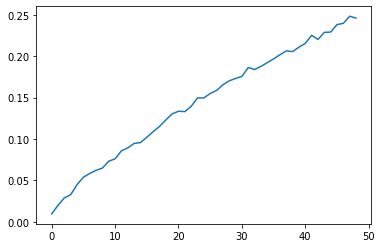

In [40]:
plt.plot(range(49),sil)
plt.show

Optimal clusters must be around 20

In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, random_state=0).fit(test_df)

In [47]:
label = kmeans.labels_
#label = np.vectorize(label)
print(label)

[19 19 19 ...  6  6  6]


In [48]:
down_ndt_df['labels'] = label

In [49]:
Download_csv=down_ndt_df.to_csv('updatedTraincluster.csv')
Download_csv